разбейте исходную таблицу на 2: по полу пассажиров
удалите пустые строки или заполните их соответствующими символами
Построить гистограмму распределения пассажиров по возрасту
Вычислите мин и макс, среднее, моду, медиану возраста пассажира каждого пола
визуализировать возраст при помощи различных настроек метода plot

изменение типов данных таблицы

my_series = pd.to_numeric(my_series)

s = s.astype(np.float16) # for series

df.drop(columns=['col1', 'col2']) # drop columns

df.drop([0, 1])# drop rows

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("titanic.csv")

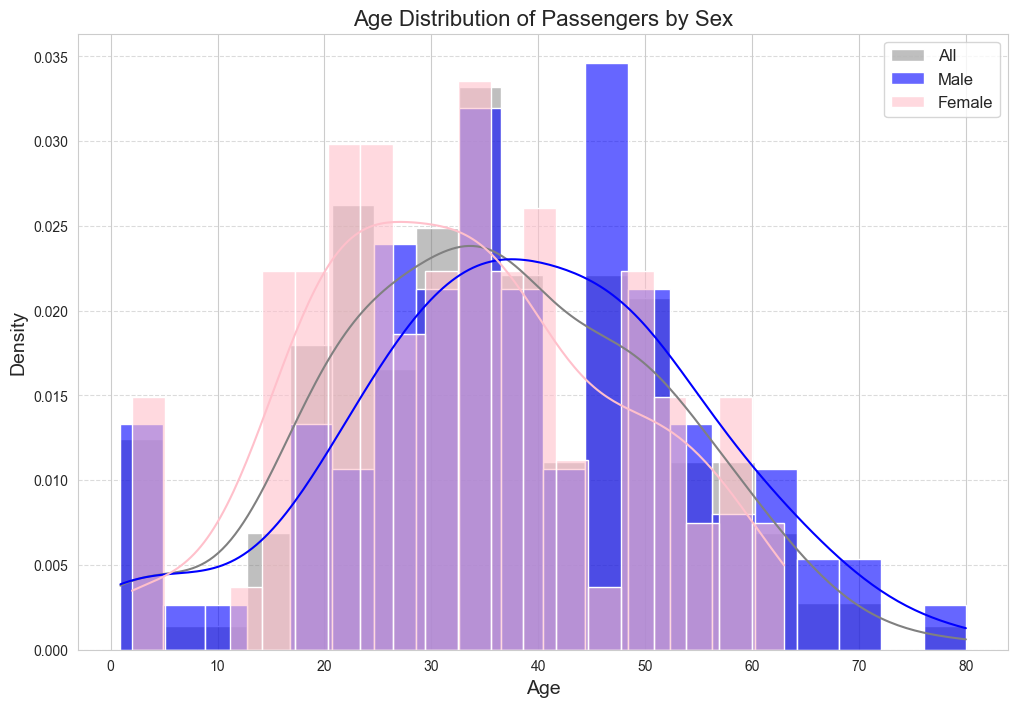

In [ ]:
df_cleaned = df.dropna()

# Устанавливаем стиль для графика
sns.set_style('whitegrid')

# Создаем фигуру
plt.figure(figsize=(12, 8))

sns.histplot(df_cleaned['Age'], bins=20, kde=True, color='gray', alpha=0.5, label='All', stat='density')
sns.histplot(male_df['Age'], bins=20, kde=True, color='blue', alpha=0.6, label='Male', stat='density')
sns.histplot(female_df['Age'], bins=20, kde=True, color='pink', alpha=0.6, label='Female', stat='density')

plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Age Distribution of Passengers by Sex', fontsize=16)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
def calculate_age_stats(df, gender):
    min_age = df['Age'].min()
    max_age = df['Age'].max()
    mean_age = df['Age'].mean()
    median_age = df['Age'].median()
    mode_age = df['Age'].mode()[0]
    print(f"{gender.capitalize()} Age Statistics:")
    print(f"Min: {min_age}, Max: {max_age}, Mean: {mean_age:.2f}, Median: {median_age}, Mode: {mode_age}\n")

calculate_age_stats(male_df, 'male')
calculate_age_stats(female_df, 'female')


Male Age Statistics:
Min: 0.92, Max: 80.0, Mean: 38.45, Median: 37.0, Mode: 36.0

Female Age Statistics:
Min: 2.0, Max: 63.0, Mean: 32.68, Median: 32.25, Mode: 24.0



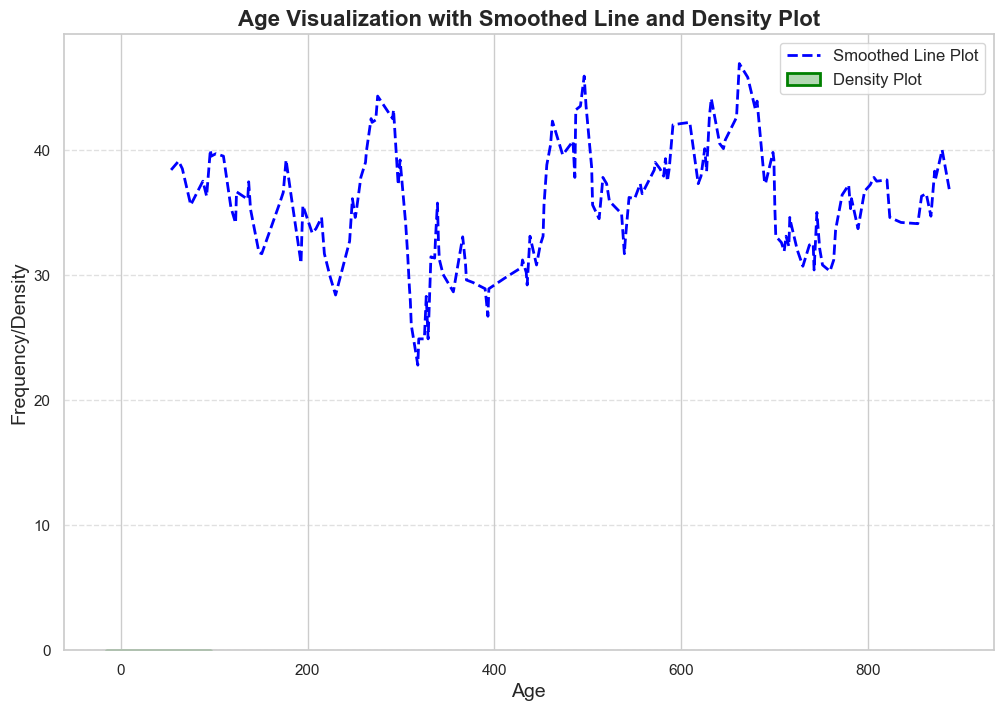

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8))

# Линейный график: сглаживаем данные и задаем стиль
df_cleaned['Age'].rolling(window=10).mean().plot(
    label='Smoothed Line Plot', 
    color='blue', 
    linewidth=2, 
    linestyle='--'
)

# Плотностной график (density)
sns.kdeplot(
    df_cleaned['Age'], 
    label='Density Plot', 
    color='green', 
    fill=True, 
    alpha=0.3, 
    linewidth=2
)

plt.title('Age Visualization with Smoothed Line and Density Plot', fontsize=16, weight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency/Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [8]:
# Изменение типов данных в таблице: преобразование столбца 'Age' в числовой тип и уменьшение размера
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Преобразуем значения в числовой тип (NaN для некорректных данных)
df['Age'] = df['Age'].astype(np.float16)  # Уменьшаем размер данных

# Проверим, что изменение произошло
print(df.dtypes)

# Удаление нескольких колонок
df = df.drop(columns=['Cabin', 'Ticket'])  # Удаляем колонки 'Cabin' и 'Ticket'

# Удаление строк по индексу
df = df.drop([0, 1])  # Удаляем строки с индексами 0 и 1

# Проверка результата
print(df.head())  # Вывод первых строк таблицы после изменений

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float16
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
   PassengerId  Survived  Pclass  \
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   

                                           Name     Sex   Age  SibSp  Parch  \
2                        Heikkinen, Miss. Laina  female  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                      Allen, Mr. William Henry    male  35.0      0      0   
5                              Moran, Mr. James    male   NaN      0      0   
6                       McCarthy, Mr. Timothy J    male  54.0      0      0   

      Fare Embarke

c:\Users\nosko\OneDrive\Рабочий стол\cse2\venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
